In [61]:
import torch.nn as nn 
from DataLoader import DataLoader 
import torch.optim as optim
from Models import RotationNN
from utils import plot_image, line_image, rotate_images
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
image_size = 64
num_samples = 10
batch_size = 1 # pure SGD

loader = DataLoader(image_size, num_samples, batch_size)
model = RotationNN(image_size * image_size)
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.2) 

In [66]:
epochs = 1000
for epoch in range(epochs):
    for x, y in loader:
        y_pred = model(x)
    
        loss = criterion(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 25 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [25/1000], Loss: 0.1868
Epoch [50/1000], Loss: 0.1852
Epoch [75/1000], Loss: 0.1870
Epoch [100/1000], Loss: 0.1835
Epoch [125/1000], Loss: 0.1827
Epoch [150/1000], Loss: 0.1816
Epoch [175/1000], Loss: 0.1821
Epoch [200/1000], Loss: 0.1846
Epoch [225/1000], Loss: 0.1876


KeyboardInterrupt: 

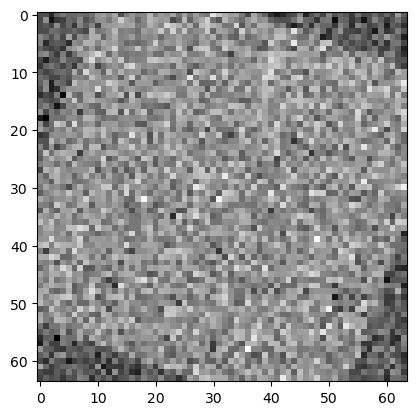

In [67]:
# testing
line = line_image(image_size)
plot_image(model(line))

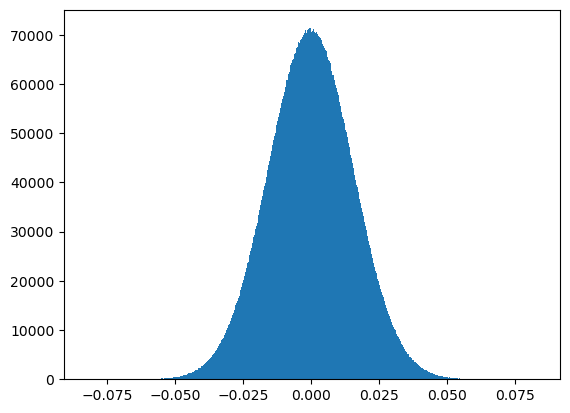

In [43]:
# analysis
import matplotlib.pyplot as plt

weights = model.fc.weight.data.cpu().numpy()
plt.hist(weights.flatten(), bins=100)
plt.show()